## 3 layer LSTM Encoder Decoder, dropout. 30 day input, 7 day forecast

In [1]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization, RepeatVector, TimeDistributed
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

Using TensorFlow backend.


In [2]:
save_dir = 'models/lstm4.6'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [31]:
num_input = 120
num_out = 3
train_X, train_y, dev_X, dev_y, test_X, test_y, train_y_acc, dev_y_acc, test_y_acc = utils.prepare_data(data, num_input, dev_size=0.2, num_preds=num_out)

train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y = dev_y.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))
train_y_acc = train_y_acc.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y_acc = dev_y_acc.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y_acc = test_y_acc.reshape((test_y.shape[0], test_y.shape[1], 1))

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)
print("train_y_acc shape", train_y_acc.shape)
print("dev_y_acc shape", dev_y_acc.shape)
print("test_y_acc shape", test_y_acc.shape)


train_X shape (568, 120, 25)
train_y shape (568, 3, 1)
dev_X shape (143, 120, 25)
dev_y shape (143, 3, 1)
test_X shape (0, 120, 25)
test_y shape (0, 3, 1)
train_y_acc shape (568, 3, 1)
dev_y_acc shape (143, 3, 1)
test_y_acc shape (0, 3, 1)


In [14]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.0005
decay = 1e-6
dropout_rate = 0.3
epochs = 1000
batch_size = 32

model = Sequential()
model.add(CuDNNLSTM(200, input_shape=input_shape))
model.add(RepeatVector(num_out))
model.add(CuDNNLSTM(200, return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))

opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 200)               181600    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 3, 200)            0         
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 3, 200)            321600    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 3, 100)            20100     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 3, 1)              101       
Total params: 523,401
Trainable params: 523,401
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 1000 epochs, 32 batch size
Train on 568 samples, validate on 71 samples
Epoch 1/1000
568/568 [==============================] - 1s 2ms/step - loss: 0.0294 - val_loss: 0.0134
Epoch 2/1000
568/568 [==============================] - 1s 973us/step - loss: 0.0080 - val_loss: 0.0060
Epoch 3/1000
568/568 [==============================] - 1s 960us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/1000
568/568 [==============================] - 1s 967us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 5/1000
568/568 [==============================] - 1s 953us/step - loss: 0.0012 - val_loss: 0.0022
Epoch 6/1000
568/568 [==============================] - 1s 944us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/1000
568/568 [==============================] - 1s 947us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/1000
568/568 [==============================] - 1s 945us/step - loss: 9.3627e-04 - val_loss: 9.3691e-04
Epoch 9/1000
568/568 [==============================] - 1

568/568 [==============================] - 1s 964us/step - loss: 2.4534e-04 - val_loss: 4.2868e-04
Epoch 146/1000
568/568 [==============================] - 1s 961us/step - loss: 2.0118e-04 - val_loss: 4.7007e-04
Epoch 147/1000
568/568 [==============================] - 1s 962us/step - loss: 1.8246e-04 - val_loss: 4.6513e-04
Epoch 148/1000
568/568 [==============================] - 1s 952us/step - loss: 1.7075e-04 - val_loss: 4.6433e-04
Epoch 149/1000
568/568 [==============================] - 1s 952us/step - loss: 1.7315e-04 - val_loss: 4.8636e-04
Epoch 150/1000
568/568 [==============================] - 1s 950us/step - loss: 1.9740e-04 - val_loss: 4.8095e-04
Epoch 151/1000
568/568 [==============================] - 1s 947us/step - loss: 2.3025e-04 - val_loss: 5.7725e-04
Epoch 152/1000
568/568 [==============================] - 1s 956us/step - loss: 2.0490e-04 - val_loss: 4.9804e-04
Epoch 153/1000
568/568 [==============================] - 1s 953us/step - loss: 1.8694e-04 - val_loss: 

Epoch 217/1000
568/568 [==============================] - 1s 967us/step - loss: 1.2681e-04 - val_loss: 4.1822e-04
Epoch 218/1000
568/568 [==============================] - 1s 962us/step - loss: 1.4148e-04 - val_loss: 4.6746e-04
Epoch 219/1000
568/568 [==============================] - 1s 964us/step - loss: 1.6270e-04 - val_loss: 4.1209e-04
Epoch 220/1000
568/568 [==============================] - 1s 959us/step - loss: 1.6350e-04 - val_loss: 4.1302e-04
Epoch 221/1000
568/568 [==============================] - 1s 949us/step - loss: 1.4502e-04 - val_loss: 4.2070e-04
Epoch 222/1000
568/568 [==============================] - 1s 944us/step - loss: 1.7216e-04 - val_loss: 4.8943e-04
Epoch 223/1000
568/568 [==============================] - 1s 944us/step - loss: 1.9291e-04 - val_loss: 5.0381e-04
Epoch 224/1000
568/568 [==============================] - 1s 961us/step - loss: 1.7556e-04 - val_loss: 4.9851e-04
Epoch 225/1000
568/568 [==============================] - 1s 946us/step - loss: 1.6845e-

Epoch 289/1000
568/568 [==============================] - 1s 946us/step - loss: 1.3962e-04 - val_loss: 4.6625e-04
Epoch 290/1000
568/568 [==============================] - 1s 952us/step - loss: 1.7246e-04 - val_loss: 4.2889e-04
Epoch 291/1000
568/568 [==============================] - 1s 948us/step - loss: 2.0839e-04 - val_loss: 4.8551e-04
Epoch 292/1000
568/568 [==============================] - 1s 952us/step - loss: 2.4125e-04 - val_loss: 4.4035e-04
Epoch 293/1000
568/568 [==============================] - 1s 938us/step - loss: 2.5146e-04 - val_loss: 4.8367e-04
Epoch 294/1000
568/568 [==============================] - 1s 940us/step - loss: 1.9000e-04 - val_loss: 5.8451e-04
Epoch 295/1000
568/568 [==============================] - 1s 941us/step - loss: 2.0952e-04 - val_loss: 5.0918e-04
Epoch 296/1000
568/568 [==============================] - 1s 941us/step - loss: 1.9300e-04 - val_loss: 4.5010e-04
Epoch 297/1000
568/568 [==============================] - 1s 945us/step - loss: 1.6077e-

Epoch 361/1000
568/568 [==============================] - 1s 941us/step - loss: 1.0485e-04 - val_loss: 3.6649e-04
Epoch 362/1000
568/568 [==============================] - 1s 949us/step - loss: 1.1920e-04 - val_loss: 3.6446e-04
Epoch 363/1000
568/568 [==============================] - 1s 949us/step - loss: 1.3013e-04 - val_loss: 3.4502e-04
Epoch 364/1000
568/568 [==============================] - 1s 952us/step - loss: 1.1791e-04 - val_loss: 3.9806e-04
Epoch 365/1000
568/568 [==============================] - 1s 937us/step - loss: 1.0016e-04 - val_loss: 3.4313e-04
Epoch 366/1000
568/568 [==============================] - 1s 946us/step - loss: 1.3266e-04 - val_loss: 5.1639e-04
Epoch 367/1000
568/568 [==============================] - 1s 941us/step - loss: 1.6159e-04 - val_loss: 3.8232e-04
Epoch 368/1000
568/568 [==============================] - 1s 941us/step - loss: 1.6682e-04 - val_loss: 4.0456e-04
Epoch 369/1000
568/568 [==============================] - 1s 944us/step - loss: 1.2399e-

Epoch 433/1000
568/568 [==============================] - 1s 953us/step - loss: 9.9213e-05 - val_loss: 3.2903e-04
Epoch 434/1000
568/568 [==============================] - 1s 962us/step - loss: 8.8650e-05 - val_loss: 3.2152e-04
Epoch 435/1000
568/568 [==============================] - 1s 968us/step - loss: 6.9899e-05 - val_loss: 3.2273e-04
Epoch 436/1000
568/568 [==============================] - 1s 959us/step - loss: 7.4194e-05 - val_loss: 3.6703e-04
Epoch 437/1000
568/568 [==============================] - 1s 957us/step - loss: 8.7859e-05 - val_loss: 3.5144e-04
Epoch 438/1000
568/568 [==============================] - 1s 949us/step - loss: 8.1762e-05 - val_loss: 3.7371e-04
Epoch 439/1000
568/568 [==============================] - 1s 952us/step - loss: 7.4336e-05 - val_loss: 4.5754e-04
Epoch 440/1000
568/568 [==============================] - 1s 954us/step - loss: 7.5462e-05 - val_loss: 4.4542e-04
Epoch 441/1000
568/568 [==============================] - 1s 959us/step - loss: 8.9780e-

Epoch 505/1000
568/568 [==============================] - 1s 955us/step - loss: 1.2608e-04 - val_loss: 3.7465e-04
Epoch 506/1000
568/568 [==============================] - 1s 960us/step - loss: 1.4856e-04 - val_loss: 4.1119e-04
Epoch 507/1000
568/568 [==============================] - 1s 967us/step - loss: 1.2295e-04 - val_loss: 3.2045e-04
Epoch 508/1000
568/568 [==============================] - 1s 964us/step - loss: 1.3566e-04 - val_loss: 4.1758e-04
Epoch 509/1000
568/568 [==============================] - 1s 959us/step - loss: 1.5934e-04 - val_loss: 3.5109e-04
Epoch 510/1000
568/568 [==============================] - 1s 950us/step - loss: 9.5139e-05 - val_loss: 3.0976e-04
Epoch 511/1000
568/568 [==============================] - 1s 951us/step - loss: 7.4770e-05 - val_loss: 3.6420e-04
Epoch 512/1000
568/568 [==============================] - 1s 955us/step - loss: 7.3593e-05 - val_loss: 3.4722e-04
Epoch 513/1000
568/568 [==============================] - 1s 958us/step - loss: 7.6154e-

Epoch 577/1000
568/568 [==============================] - 1s 961us/step - loss: 4.6266e-05 - val_loss: 3.1766e-04
Epoch 578/1000
568/568 [==============================] - 1s 969us/step - loss: 4.4160e-05 - val_loss: 3.3277e-04
Epoch 579/1000
568/568 [==============================] - 1s 970us/step - loss: 4.6812e-05 - val_loss: 3.2930e-04
Epoch 580/1000
568/568 [==============================] - 1s 969us/step - loss: 4.5456e-05 - val_loss: 3.2183e-04
Epoch 581/1000
568/568 [==============================] - 1s 965us/step - loss: 4.4642e-05 - val_loss: 3.5353e-04
Epoch 582/1000
568/568 [==============================] - 1s 966us/step - loss: 5.1045e-05 - val_loss: 3.6147e-04
Epoch 583/1000
568/568 [==============================] - 1s 964us/step - loss: 4.5002e-05 - val_loss: 3.2425e-04
Epoch 584/1000
568/568 [==============================] - 1s 962us/step - loss: 5.2937e-05 - val_loss: 3.4946e-04
Epoch 585/1000
568/568 [==============================] - 1s 962us/step - loss: 4.7382e-

Epoch 649/1000
568/568 [==============================] - 1s 961us/step - loss: 7.8007e-05 - val_loss: 3.2431e-04
Epoch 650/1000
568/568 [==============================] - 1s 958us/step - loss: 6.4546e-05 - val_loss: 3.4264e-04
Epoch 651/1000
568/568 [==============================] - 1s 960us/step - loss: 7.7261e-05 - val_loss: 4.0192e-04
Epoch 652/1000
568/568 [==============================] - 1s 956us/step - loss: 5.2277e-05 - val_loss: 3.0068e-04
Epoch 653/1000
568/568 [==============================] - 1s 962us/step - loss: 3.8659e-05 - val_loss: 3.3125e-04
Epoch 654/1000
568/568 [==============================] - 1s 953us/step - loss: 3.2751e-05 - val_loss: 3.0903e-04
Epoch 655/1000
568/568 [==============================] - 1s 956us/step - loss: 3.3289e-05 - val_loss: 3.4720e-04
Epoch 656/1000
568/568 [==============================] - 1s 953us/step - loss: 3.9920e-05 - val_loss: 3.2551e-04
Epoch 657/1000
568/568 [==============================] - 1s 956us/step - loss: 3.6730e-

Epoch 721/1000
568/568 [==============================] - 1s 958us/step - loss: 4.0357e-05 - val_loss: 3.5746e-04
Epoch 722/1000
568/568 [==============================] - 1s 955us/step - loss: 3.6155e-05 - val_loss: 3.0514e-04
Epoch 723/1000
568/568 [==============================] - 1s 957us/step - loss: 3.0498e-05 - val_loss: 3.4574e-04
Epoch 724/1000
568/568 [==============================] - 1s 966us/step - loss: 2.8588e-05 - val_loss: 2.9172e-04
Epoch 725/1000
568/568 [==============================] - 1s 960us/step - loss: 2.7074e-05 - val_loss: 2.9441e-04
Epoch 726/1000
568/568 [==============================] - 1s 955us/step - loss: 2.6241e-05 - val_loss: 3.1266e-04
Epoch 727/1000
568/568 [==============================] - 1s 949us/step - loss: 2.2832e-05 - val_loss: 3.1359e-04
Epoch 728/1000
568/568 [==============================] - 1s 952us/step - loss: 2.2402e-05 - val_loss: 3.0849e-04
Epoch 729/1000
568/568 [==============================] - 1s 948us/step - loss: 2.3992e-

Epoch 793/1000
568/568 [==============================] - 1s 949us/step - loss: 2.6777e-05 - val_loss: 3.4052e-04
Epoch 794/1000
568/568 [==============================] - 1s 941us/step - loss: 3.5324e-05 - val_loss: 3.3983e-04
Epoch 795/1000
568/568 [==============================] - 1s 942us/step - loss: 3.7231e-05 - val_loss: 3.4963e-04
Epoch 796/1000
568/568 [==============================] - 1s 939us/step - loss: 3.7756e-05 - val_loss: 3.3085e-04
Epoch 797/1000
568/568 [==============================] - 1s 950us/step - loss: 3.0185e-05 - val_loss: 3.1174e-04
Epoch 798/1000
568/568 [==============================] - 1s 954us/step - loss: 2.5075e-05 - val_loss: 3.4845e-04
Epoch 799/1000
568/568 [==============================] - 1s 942us/step - loss: 3.7127e-05 - val_loss: 3.1126e-04
Epoch 800/1000
568/568 [==============================] - 1s 958us/step - loss: 3.5674e-05 - val_loss: 3.2622e-04
Epoch 801/1000
568/568 [==============================] - 1s 951us/step - loss: 3.5736e-

Epoch 865/1000
568/568 [==============================] - 1s 952us/step - loss: 1.8686e-05 - val_loss: 3.1528e-04
Epoch 866/1000
568/568 [==============================] - 1s 947us/step - loss: 1.9671e-05 - val_loss: 3.1819e-04
Epoch 867/1000
568/568 [==============================] - 1s 955us/step - loss: 1.9549e-05 - val_loss: 3.1856e-04
Epoch 868/1000
568/568 [==============================] - 1s 947us/step - loss: 1.7672e-05 - val_loss: 3.1756e-04
Epoch 869/1000
568/568 [==============================] - 1s 951us/step - loss: 1.8066e-05 - val_loss: 3.2090e-04
Epoch 870/1000
568/568 [==============================] - 1s 947us/step - loss: 1.7596e-05 - val_loss: 3.1648e-04
Epoch 871/1000
568/568 [==============================] - 1s 950us/step - loss: 1.6584e-05 - val_loss: 3.2538e-04
Epoch 872/1000
568/568 [==============================] - 1s 949us/step - loss: 1.6315e-05 - val_loss: 3.0183e-04
Epoch 873/1000
568/568 [==============================] - 1s 947us/step - loss: 2.0325e-

Epoch 937/1000
568/568 [==============================] - 1s 942us/step - loss: 3.5011e-05 - val_loss: 3.3366e-04
Epoch 938/1000
568/568 [==============================] - 1s 939us/step - loss: 2.9788e-05 - val_loss: 3.3304e-04
Epoch 939/1000
568/568 [==============================] - 1s 937us/step - loss: 3.0505e-05 - val_loss: 2.8975e-04
Epoch 940/1000
568/568 [==============================] - 1s 943us/step - loss: 3.1991e-05 - val_loss: 3.2383e-04
Epoch 941/1000
568/568 [==============================] - 1s 937us/step - loss: 2.8597e-05 - val_loss: 3.7415e-04
Epoch 942/1000
568/568 [==============================] - 1s 944us/step - loss: 3.0644e-05 - val_loss: 2.8527e-04
Epoch 943/1000
568/568 [==============================] - 1s 940us/step - loss: 2.5254e-05 - val_loss: 3.2234e-04
Epoch 944/1000
568/568 [==============================] - 1s 941us/step - loss: 2.2490e-05 - val_loss: 3.1319e-04
Epoch 945/1000
568/568 [==============================] - 1s 940us/step - loss: 2.4671e-

In [16]:
preds_train = model.predict(train_X).squeeze()
preds_dev = model.predict(dev_X).squeeze()
preds_test = model.predict(test_X).squeeze()
print("MSE Train:", mean_squared_error(preds_train.reshape(-1,1), train_y.reshape(-1,1)))
print("MSE Dev:", mean_squared_error(preds_dev.reshape(-1,1), dev_y.reshape(-1,1)))
print("MSE Test:", mean_squared_error(preds_test.reshape(-1,1), test_y.reshape(-1,1)))

MSE Train: 2.0866601346375232e-05
MSE Dev: 0.00030119098479360035
MSE Test: 0.0002646489143073379


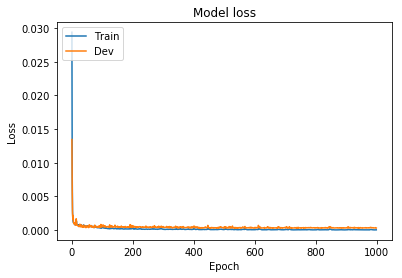

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

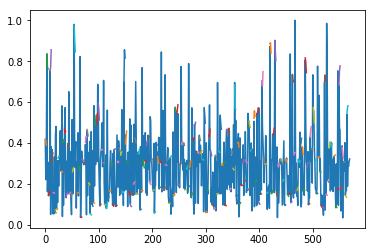

In [19]:
predicted_train = model.predict(train_X).squeeze()
predicted_train = predicted_train.reshape(predicted_train.shape[0], -1)
predicted_train = predicted_train[::num_out]
true_train = train_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_train.tolist(), true_train, num_out)

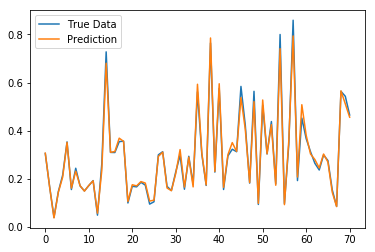

In [25]:
# predicted_dev = model.predict(dev_X).squeeze()
# predicted_dev = predicted_dev[::num_out]
# true_dev = dev_y[:, 0].reshape(-1,1)
# utils.plot_results_multiple(predicted_dev.tolist(), true_dev, num_out)

predicted_dev = model.predict(dev_X).squeeze()
predicted_dev = predicted_dev[:, 0].reshape(-1,1)
true_dev = dev_y[:, 0].reshape(-1,1)
utils.plot_results(predicted_dev, true_dev)

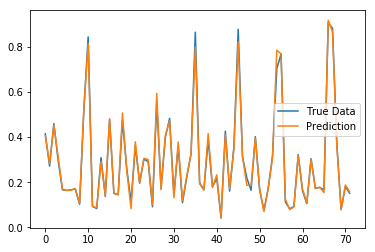

In [30]:
# predicted_test = model.predict(test_X).squeeze()
# predicted_test = predicted_test[::num_out]
# true_test = test_y[:, 0].reshape(-1,1)
# utils.plot_results_multiple(predicted_test.tolist(), true_test, num_out)

predicted_test = model.predict(test_X).squeeze()
predicted_test = predicted_test[:, 0].reshape(-1,1)
true_test = test_y[:, 0].reshape(-1,1)
utils.plot_results(predicted_test, true_test)

In [27]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 0.04140916206605311
MSE Dev: 0.0003620869711970964
MSE Test: 0.046975196912377976


In [28]:
print("Acc Train:", utils.direction_accuracy(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("Acc Dev:", utils.direction_accuracy(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

Acc Train: 0.5661375661375662
Acc Dev: 0.9714285714285714
Acc Test: 0.676056338028169


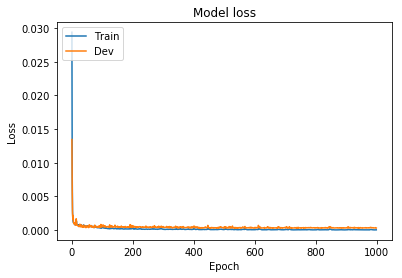

In [29]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()